Домашнее задание

Оригнальное изображение


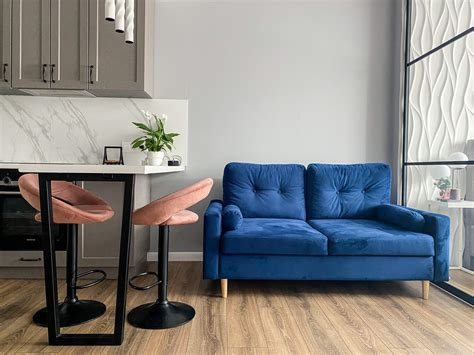

Изображение после изменения цвета на синий


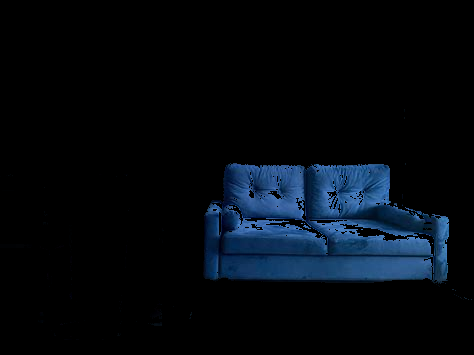

Изображение после открытия


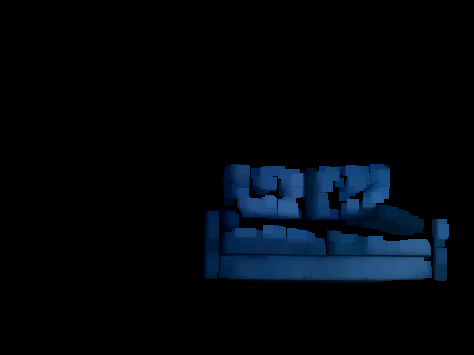

Изображение после конвертации в HSV


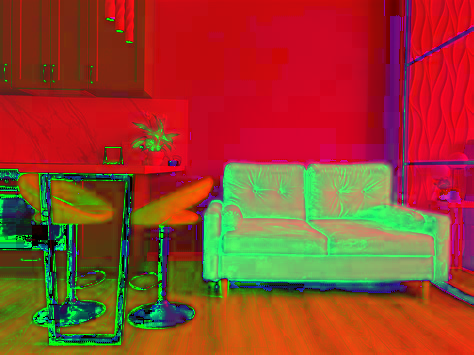

Изображение после наложения маски для унификации цвета


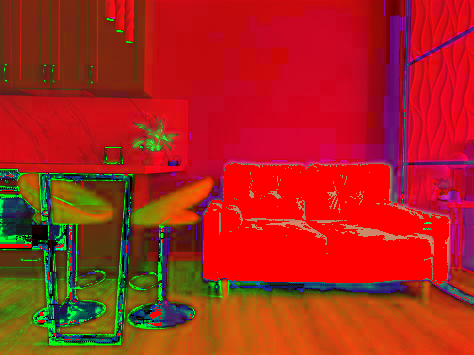

RGB Изображение после наложения маски


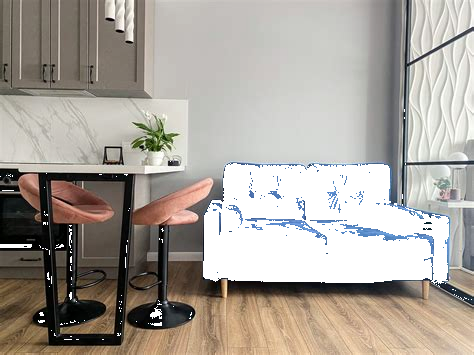

Изображение после преобразования HSV к оттенкам серого


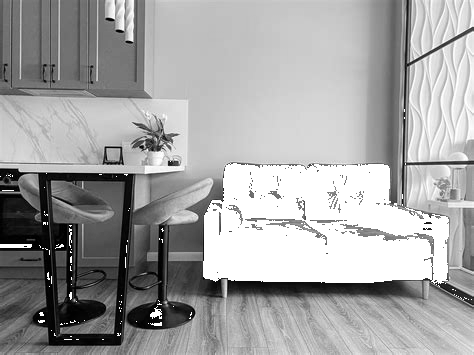

Пороговое изображение


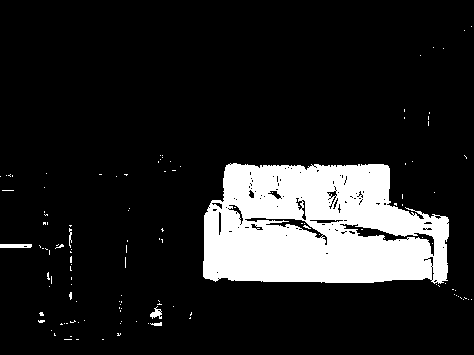

Контур


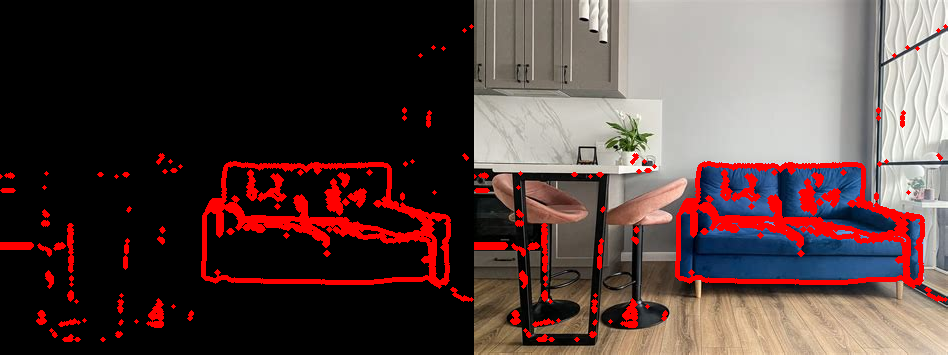

Изображение после открытия


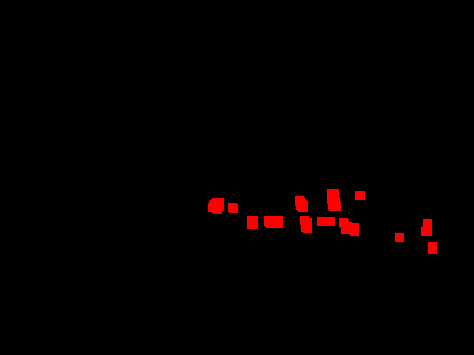

Открытие на пороговое изображение


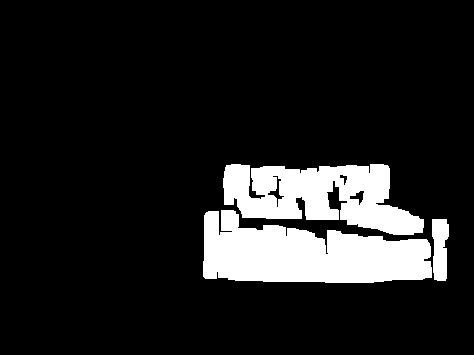

Контур


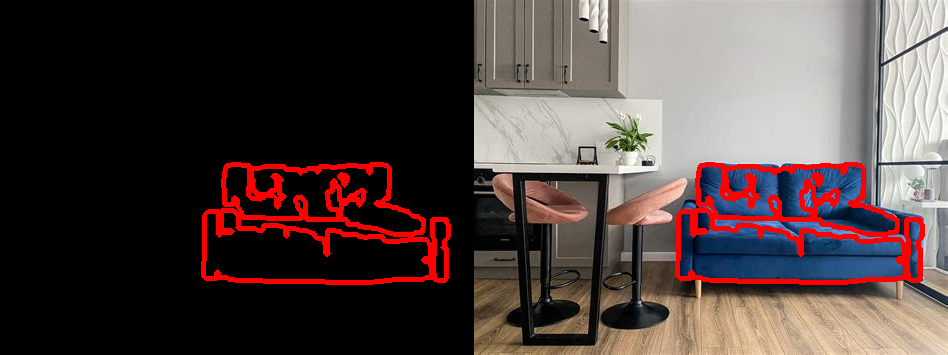

Контур самый большой


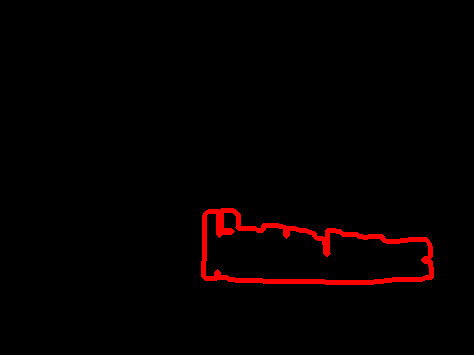

Оригнальное изображение


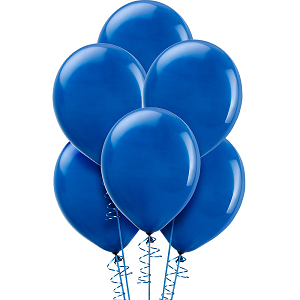

Изображение после изменения цвета на синий


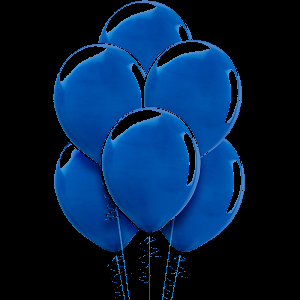

Изображение после открытия


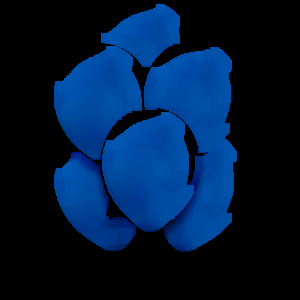

Изображение после конвертации в HSV


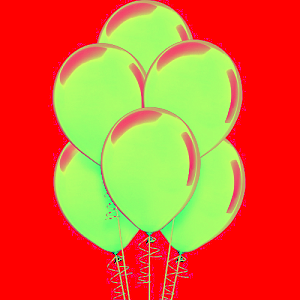

Изображение после наложения маски для унификации цвета


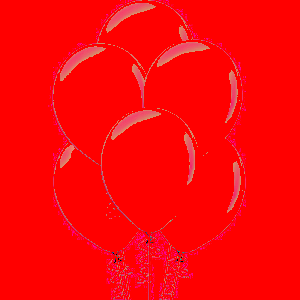

RGB Изображение после наложения маски


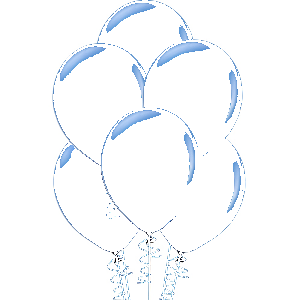

Изображение после преобразования HSV к оттенкам серого


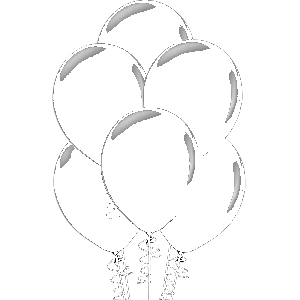

Пороговое изображение


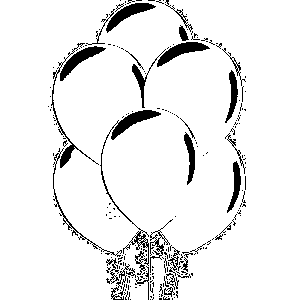

Контур


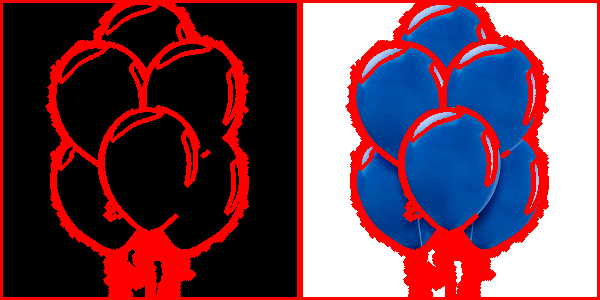

Изображение после открытия


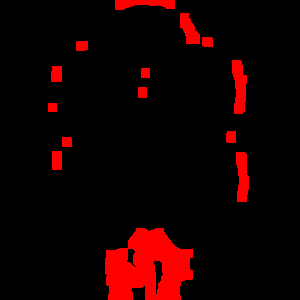

Открытие на пороговое изображение


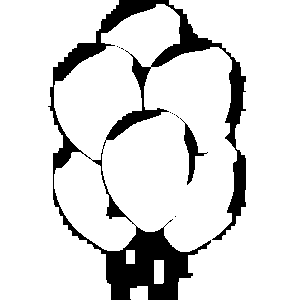

Контур


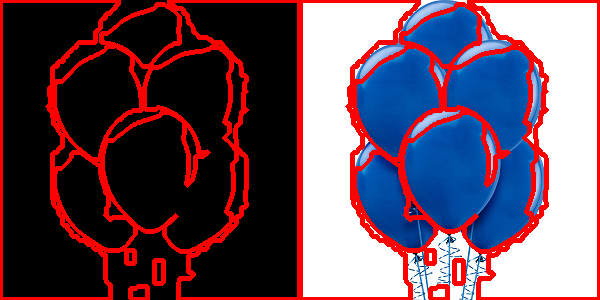

Контур самый большой


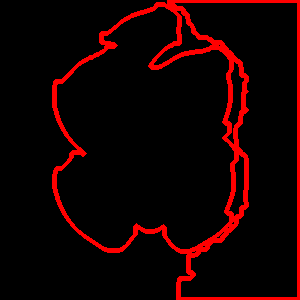

In [ ]:
import numpy as np
import cv2 as cv
from skimage import io
from google.colab.patches import cv2_imshow

def find_greatest_contour(contours):
    # Поиск самого большого контура
    largest_area = 0
    largest_contour_index = -1
    for i in range(len(contours)):
        area = cv.contourArea(contours[i])
        if area > largest_area:
            largest_area = area
            largest_contour_index = i
    return largest_area, largest_contour_index

def counter_find(base_image):

    image = cv.cvtColor(base_image, cv.COLOR_BGR2RGB)
    print("Оригнальное изображение")
    imageHSV = cv.cvtColor(base_image, cv.COLOR_RGB2HSV)
    cv2_imshow(image)
    # Преобразование в цветовое пространство HSV
    image_hsv = cv.cvtColor(base_image, cv.COLOR_RGB2HSV)

    # Создание маски для синего цвета
    mask = cv.inRange(image_hsv, (100, 150, 0), (140, 255, 255))
    onlyBlue = cv2.bitwise_and(image, image, mask=mask)

    print("Изображение после изменения цвета на синий")
    cv2_imshow(onlyBlue)

    kernel = np.ones((9,9),np.uint8)
    opening = cv2.morphologyEx(onlyBlue, cv2.MORPH_OPEN, kernel)
    print("Изображение после открытия")
    cv2_imshow(opening)

    print("Изображение после конвертации в HSV")
    cv2_imshow(imageHSV)

    resultImage = imageHSV.copy();
    resultImage[(mask > 0)] = [0, 0, 255]

    print("Изображение после наложения маски для унификации цвета")
    cv2_imshow(resultImage)

    imageRGB = cv2.cvtColor(resultImage, cv2.COLOR_HSV2BGR)
    print("RGB Изображение после наложения маски")
    cv2_imshow(imageRGB)

    # Преобразование в оттенки серого и пороговая обработка для поиска контуров
    gray = cv2.cvtColor(imageRGB, cv2.COLOR_BGR2GRAY)
    print("Изображение после преобразования HSV к оттенкам серого")
    cv2_imshow(gray)

    _, threshold = cv2.threshold(gray, 254, 255, cv.THRESH_BINARY)
    print("Пороговое изображение")
    cv2_imshow(threshold)
    # Поиск контура
    counturResult = np.zeros(image.shape, dtype = np.uint8)
    copyImage = image.copy()

    contours, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(counturResult, contours, -1, (0, 0, 255), 3)
    cv2.drawContours(copyImage, contours, -1, (0, 0, 255), 3)

    print("Контур")
    cv2_imshow(cv.hconcat((counturResult, copyImage)))

    kernel = np.ones((9,9),np.uint8)
    opening = cv2.morphologyEx(counturResult, cv2.MORPH_OPEN, kernel)
    print("Изображение после открытия")
    cv2_imshow(opening)

    # Открытие на пороговое изображение
    opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)
    print("Открытие на пороговое изображение")
    cv2_imshow(opening)

    counturResult = np.zeros(image.shape, dtype = np.uint8)
    copyImage = image.copy()

    contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(counturResult, contours, -1, (0, 0, 255), 3)
    cv2.drawContours(copyImage, contours, -1, (0, 0, 255), 3)

    print("Контур")
    cv2_imshow(cv.hconcat((counturResult, copyImage)))

    # Сортировка контура и поиска самого большого
    _, index =find_greatest_contour(contours)

    counturResult = np.zeros(image.shape, dtype = np.uint8)
    cv2.drawContours(counturResult, contours, index, (0, 0, 255), 3)

    print("Контур самый большой")
    cv2_imshow(counturResult)


# Загрузка изображений по URL
#image_url1 = "https://habrastorage.org/r/w1560/getpro/habr/upload_files/13a/8bb/bb5/13a8bbbb52f60bad2637a2fb6fd3c725.png"
base_image1 = io.imread('apt.jpg')
counter_find(base_image1)

#image_url2 = "https://habrastorage.org/r/w1560/getpro/habr/upload_files/cc2/a6a/679/cc2a6a679de23ddb153a686bcde33671.png"
base_image2 = io.imread('balloon.png')
counter_find(base_image2)



